本项目旨在通过对英文文本数据进行分析，建立贝叶斯分类模型，来对垃圾邮件进行分类。

- 文本数据探索性分析
- 文本数据预处理
- 建立贝叶斯分类模型
- 评估分类模型的效果

In [1]:
#导入常用的数据分析库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#导入数据集
df = pd.read_csv('D:\\Py_dataset\\SMSSpamCollection',sep = '\t',names = ['class','content'])
df.head()

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 1.对该数据集进行探索性分析

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5572 non-null   object
 1   content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.describe()

,class,content
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


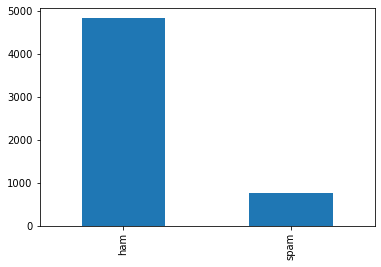

In [5]:
#查看样本的分布

df['class'].value_counts().plot(kind = 'bar')

由上述结果可以看出，正常邮件的数量远多于垃圾邮件，也符合我们的工作生活中的常识。

pd.info()和pd.describe()方法可以很好的展示数值样本的分布特性，但不能很好的展示文本数据的分布特性。在此，我们绘制词云对文本数据进行展示。

In [6]:
#定义一个绘制词云的方法
from wordcloud import WordCloud,STOPWORDS

def get_wordcloud(text_data,title):
  wordcloud = WordCloud(background_color='black',
                        stopwords=set(STOPWORDS),
                        max_font_size=40, 
                        relative_scaling=1.0,
                        random_state=1
  ).generate(str(text_data))

  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')
  plt.title(title)
  plt.imshow(wordcloud)
  plt.show()

In [7]:
#将样本数据分为正常邮件和垃圾邮件
ham_message = df[df['class'] == 'ham']['content']
spam_message = df[df['class'] == 'spam']['content']

In [8]:
ham_message[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: content, dtype: object

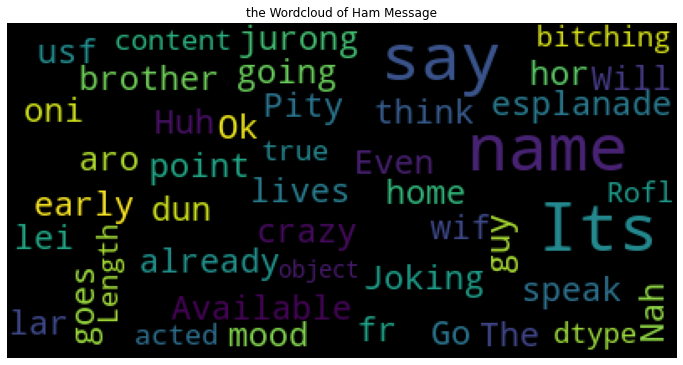

In [9]:
#绘制正常邮件的词云
get_wordcloud(ham_message,'the Wordcloud of Ham Message')

由上面的词云可以看出，正常邮件中Name,Say,Point,Going这些词出现的比较多。

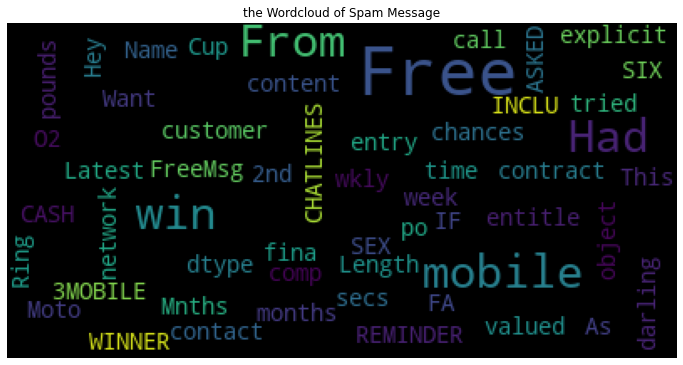

In [10]:
#绘制垃圾邮件的词云
get_wordcloud(spam_message,'the Wordcloud of Spam Message')

可以看出，垃圾邮件中Free,mobile,win,CASH,pounds,call这些词语出现的比较多。

In [11]:
#添加一个邮件内容长度的特征

df['content_length'] = df['content'].apply(len)
df.head()

,class,content,content_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


class
ham     AxesSubplot(0.125,0.125;0.775x0.755)
spam    AxesSubplot(0.125,0.125;0.775x0.755)
Name: content_length, dtype: object

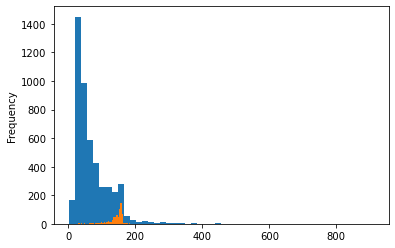

In [12]:
#观察垃圾邮件和正常邮件的长度分布

df.groupby('class')['content_length'].plot(kind = 'hist',bins = 50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025054D90470>,
      dtype=object)

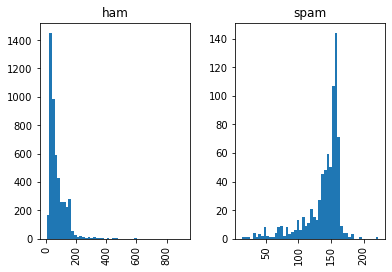

In [13]:
df.hist(bins = 50,by = 'class',column = 'content_length')

In [14]:
df.groupby('class')['content_length'].mean()

class
ham      71.482487
spam    138.670683
Name: content_length, dtype: float64

从词数上来看，垃圾邮件的长度要远大于正常邮件。

## 2.文本数据预处理

- 大小写转换
- 去停用词和标点符号
- 构建文本数据向量

In [21]:
import string

In [23]:
stopwords = open('D:\\nlp_dataset\\stop_words.txt',encoding = 'utf-8').read().splitlines()

In [24]:
stopwords[:10]

["\ufeffain'",
 'happy',
 'isn',
 'ain',
 'al',
 'couldn',
 'didn',
 'doesn',
 'hadn',
 'hasn']

In [25]:
#大小转换
df['content'] = df['content'].str.lower()

In [26]:
#构建文本处理函数，去掉停用词和标点符号


def text_process(text):
    cleaned_content = []
    for line in text:
    
        #去掉标点符号
        temp = [w for w in line if w not in string.punctuation]
        temp = ''.join(temp)

        #去停用词
        cleaned_words = [w for w in temp.split() if w not in stopwords]
        cleaned_words = ' '.join(cleaned_words)
        cleaned_content.append(cleaned_words)
    return(cleaned_content)

In [18]:
#将文本数据分为特征和标签数据

X = df['content']
Y = df['class']

In [27]:
#将文本类容转化为list格式
X = df['content'].values.tolist()

In [28]:
X[:5]

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though"]

In [29]:
cleaned_X = text_process(X)

In [30]:
cleaned_X[:5]

['jurong crazy bugis la buffet cine amore wat',
 'lar joking wif oni',
 'free entry 2 wkly comp win fa cup final tkts 21st 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s',
 'dun hor',
 'nah dont usf lives']

In [31]:
#对标签进行映射

class_map = {'ham':0,'spam':1}
Y = Y.map(class_map)

In [32]:
#构建词袋模型，将特征数据转换为向量

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_cv = cv.fit_transform(cleaned_X)

In [33]:
#词向量矩阵的大小
X_cv.shape

(5572, 8963)

In [34]:
#对训练集和测试集进行切分

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_cv,Y,test_size = 0.3,random_state = 0)

## 3.建立朴素贝叶斯模型

In [35]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train,y_train)

MultinomialNB()

In [36]:
#对训练集进行预测

pred = NB.predict(X_test)

## 4.评估模型效果

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1451
           1       0.89      0.95      0.92       221

    accuracy                           0.98      1672
   macro avg       0.94      0.97      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [38]:
print(confusion_matrix(y_test,pred,labels = [0,1]))

[[1424   27]
 [  10  211]]


由上述结果可知，在使用默认参数的条件下，模型precision和recall均在90%以上。

## 5.使用TF-IDF构造词向量，观察模型的效果

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tf = TfidfVectorizer()
X_Tf = Tf.fit_transform(cleaned_X)

In [40]:
#对于每一个词，计算一个tfidf值
print(X_Tf[1])

  (0, 5758)	0.5680234078725725
  (0, 8624)	0.44852688817021014
  (0, 4470)	0.5441813263961918
  (0, 4691)	0.4243108797790347


In [41]:
#对训练集和测试集进行切分

X_train,X_test,y_train,y_test = train_test_split(X_cv,Y,test_size = 0.3,random_state = 0)

In [42]:
#训练并预测
tf_NB = MultinomialNB()
tf_NB.fit(X_train,y_train)
tf_pred = NB.predict(X_test)

In [43]:
print(classification_report(y_test,tf_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1451
           1       0.89      0.95      0.92       221

    accuracy                           0.98      1672
   macro avg       0.94      0.97      0.95      1672
weighted avg       0.98      0.98      0.98      1672



在这个数据集中，使用CountVectorizer和TfidfVectorizer分别构造词向量，模型的计算结果基本上是相同的。

##  附加：逻辑回归、Xgboost、支持向量机

### 逻辑回归

In [44]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [45]:
pred = LR.predict(X_test)

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1451
           1       0.98      0.86      0.92       221

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



由上述结果可以看出逻辑回归模型的效果也是非常不错的。

### Xgboost

In [51]:
import time

#导入xgboost
import xgboost as xgb
#将数据转换为xgboost的底层格式
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)
#设置xgboost的参数
params = {
    'booster':'gbtree',     #  tree-based models
    'objective': 'multi:softmax', 
    'num_class':2, 
    'eta': 0.1,             
    'gamma':0,              
    'alpha': 0,             
    'lambda': 2,            
    'max_depth': 3,         
    'subsample': 1,         
    'colsample_bytree': 1, 
    'min_child_weight': 1,
    'nthread':1,      
}
num_round = 10

start_time = time.time()
bst = xgb.train(params,dtrain,num_round)
end_time = time.time()
print('The time usage of xgboost {}'.format(end_time - start_time))

y_pred = bst.predict(dtest)
accuracy = np.sum(y_pred == y_test)/len(y_train)
print('The accuracy of xgboost {}'.format(accuracy))

The time usage of xgboost 0.0666501522064209
The accuracy of xgboost 0.40205128205128204


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1451
           1       0.96      0.55      0.70       221

    accuracy                           0.94      1672
   macro avg       0.95      0.77      0.83      1672
weighted avg       0.94      0.94      0.93      1672



由上述结果可以看出，Xgboost在垃圾邮件中的recall值仅为0.55，说明会把45%的垃圾邮件识别为正常邮件，所以该模型的效果并不是很好。

### 支持向量机

In [53]:
from sklearn.svm import SVC

In [56]:
svc = SVC()
svc.fit(X_train,y_train)
pred = svc.predict(X_test)

In [57]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1451
           1       0.97      0.86      0.91       221

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [60]:
#对svc进行参数优化

from sklearn.model_selection import GridSearchCV

param_grid = {'C':range(1,5),
             'kernel':['linear','rbf','poly'],
             'gamma':[0.4,0.6,0.8,1,1.2]}

svc = SVC()

grid = GridSearchCV(svc,param_grid,cv=3,verbose = 2,n_jobs = -1)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   12.6s finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 5), 'gamma': [0.4, 0.6, 0.8, 1, 1.2],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [61]:
grid.best_score_

0.971025641025641

In [62]:
grid.best_params_

{'C': 1, 'gamma': 0.4, 'kernel': 'linear'}

In [63]:
best_model = grid.best_estimator_

In [64]:
pred = best_model.predict(X_test)

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1451
           1       0.99      0.88      0.93       221

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



综合比较下来，MultinomialNB该垃圾邮件分类任务中的效果最好。